In [1]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [5]:
def upperBound(beta, H, k):
    eigenv = np.linalg.eigvalsh(H)
    norm = np.linalg.norm(H, ord=1)
    return (beta**2*norm**2/(4*k) + beta**(k+1) * norm**(k+1)/ (sp.special.factorial(k+1) * 2**(k))) * np.exp(beta * norm/2)/np.linalg.norm(sp.linalg.expm(-beta*H/2))


### Norm of H

[Qibo 0.2.16|INFO|2025-04-01 14:18:31]: Using numpy backend on /CPU:0
[Qibo 0.2.16|WARNING|2025-04-01 14:18:31]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


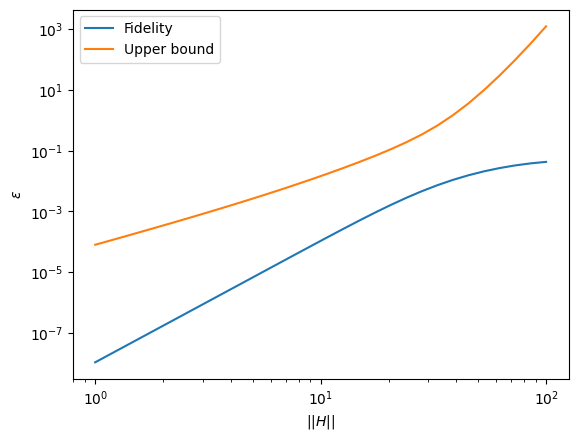

In [6]:
beta = 1
nqubits = 4
norm = np.logspace(0, 2, 30)
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 1/np.linalg.norm(H)
k = 5
error = np.zeros(len(norm))
bound = np.zeros(len(norm))

for i in range(len(norm)):
    Htest = H * norm[i]
    fidelity = thermalStatePrepBest(beta, Htest, nqubits, K = k)
    error[i] = 1 - fidelity
    bound[i] = upperBound(beta, Htest, k)

plt.figure()
plt.plot(norm, error, label = 'Fidelity')
plt.plot(norm, bound, label = 'Upper bound')
plt.xlabel(r'$||H||$')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### $\beta$

[Qibo 0.2.16|WARNING|2025-04-01 14:18:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


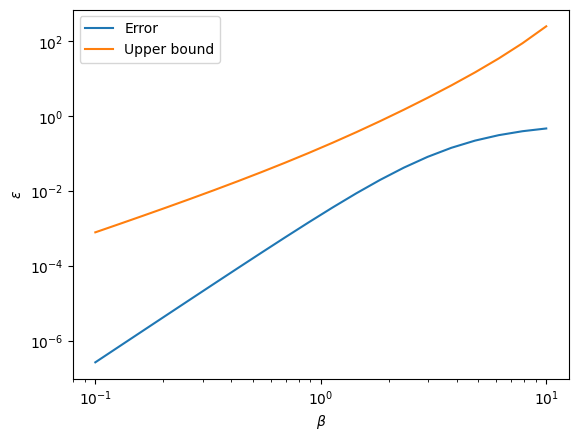

In [7]:
beta = np.logspace(-1, 1, 20)
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 10/np.linalg.norm(H)
k = 1
error = np.zeros(len(beta))
upperBoundValue = np.zeros(len(beta))

for i in range(len(beta)):
    fidelity = thermalStatePrepBest(beta[i], H, nqubits, K = k)
    error[i] = 1 - fidelity
    upperBoundValue[i] = upperBound(beta[i], H, k)  

plt.figure()
plt.plot(beta, error, label = 'Error')
plt.plot(beta, upperBoundValue, label = 'Upper bound')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.legend()


### K

[Qibo 0.2.16|WARNING|2025-04-01 14:18:40]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


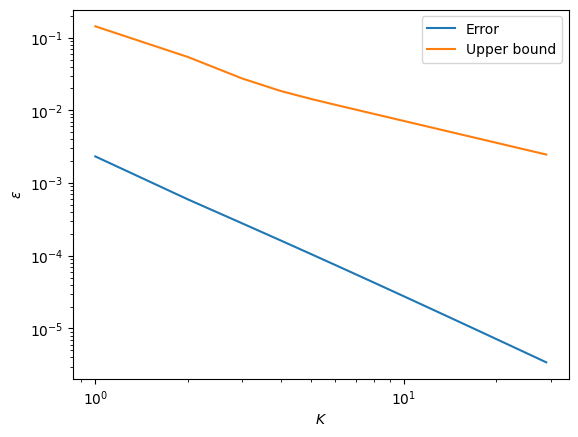

In [8]:
beta = 1
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 10/np.linalg.norm(H)
k = np.arange(1,30,1)
eps = np.zeros(len(k))
upperBoundValue = np.zeros(len(k))

for i in range(len(k)):
    fidelity  = thermalStatePrepBest(beta, H, nqubits, "DBI", K = k[i])
    eps[i] = 1 - fidelity
    upperBoundValue[i] = upperBound(beta, H, k[i])

plt.figure()
plt.plot(k, eps, label = 'Error')
plt.plot(k, upperBoundValue, label = 'Upper bound')
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')


[Qibo 0.2.16|WARNING|2025-04-01 14:18:54]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:18:54]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:18:54]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:04]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:04]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:11]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:12]: Calculating 

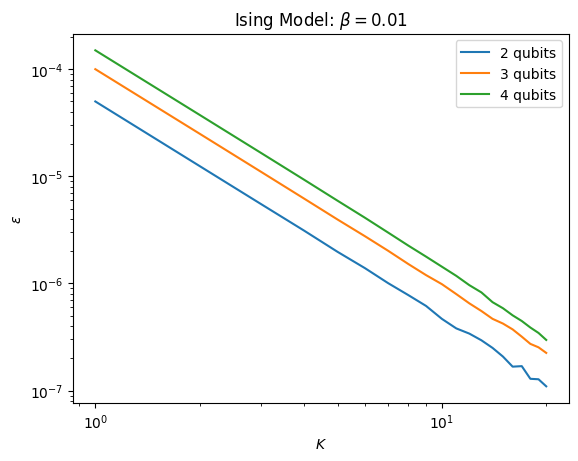

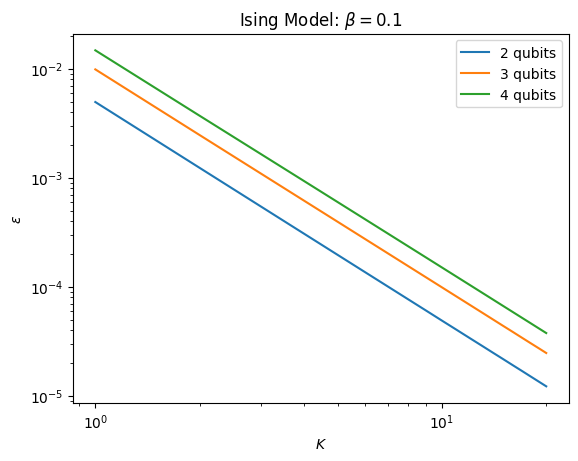

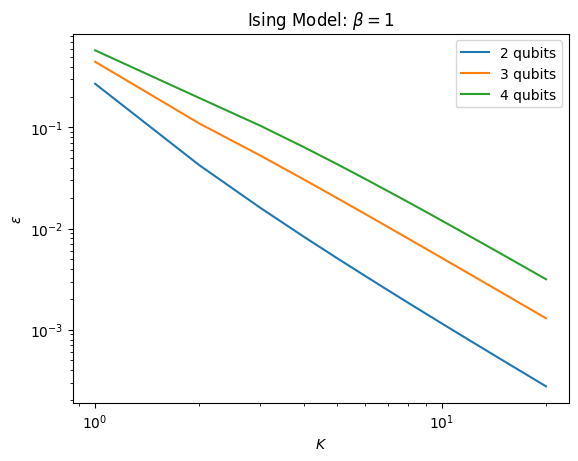

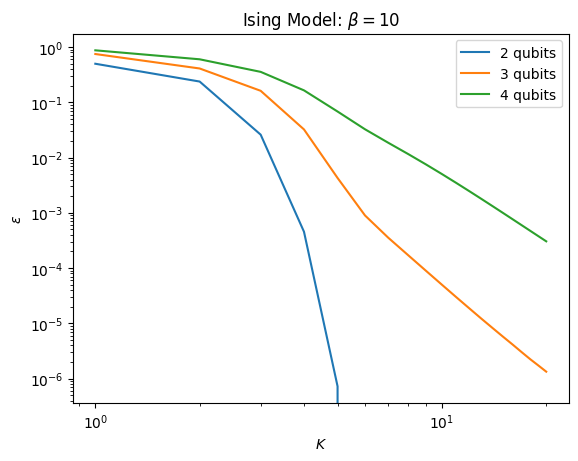

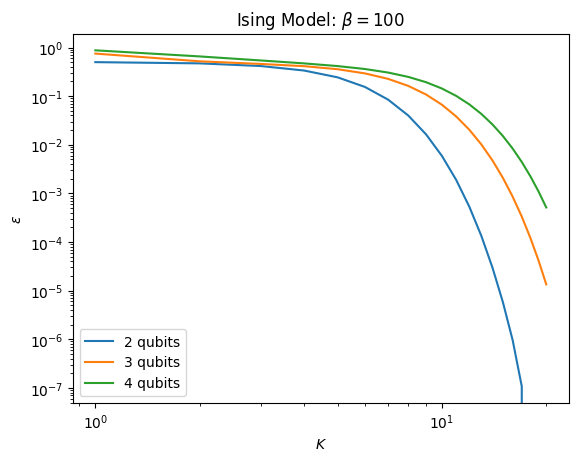

In [9]:
nqubits = [2,3,4]
beta = [0.01 , 0.1 , 1, 10, 100]
for l in range(len(beta)):
    plt.figure()
    plt.title("Ising Model: " + r'$\beta = $' + str(beta[l]))
    for j in range(len(nqubits)):
        H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits[j]-1)])
        H = hamiltonians.SymbolicHamiltonian(H_def).matrix
        H = np.kron(H,np.eye(2**nqubits[j]))
        H = sp.sparse.csr_matrix(H)
        size = 20
        K = np.linspace(1, size, size)
        fidelity = np.empty(size+1)
        initState = tfd0(nqubits[j])
        tfd = TFD(beta[l], H, initState)
        fidelity[0] = UJFidelity(tfd, initState)
        for k in range(size):
            initState = tfd0(nqubits[j])
            for i in range(k):
                s = bestApproximatingStep(H, initState, beta[l]/(2*K[k]))
                initState = DBI(1,H,s,initState)[-1]

            fidelity[k+1] = UJFidelity(tfd, initState)
        plt.plot(K, 1-fidelity[1:], label = f'{nqubits[j]} qubits')
    plt.xscale("log")
    plt.yscale('log')
    plt.xlabel(r'$K$')
    plt.ylabel(r'$\epsilon$')
    plt.legend()


[Qibo 0.2.16|WARNING|2025-04-01 14:19:36]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:36]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:45]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:45]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:45]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:51]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-01 14:19:52]: Calculating 

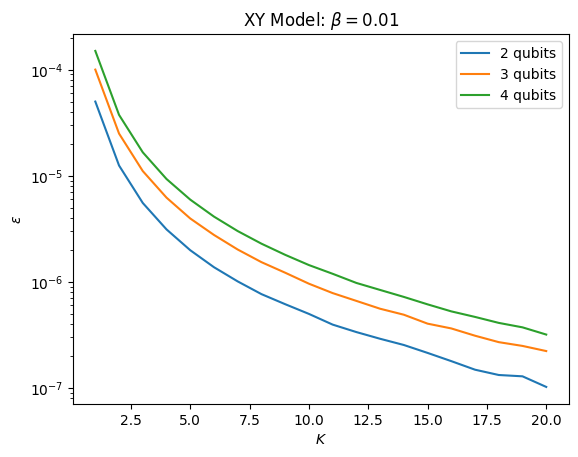

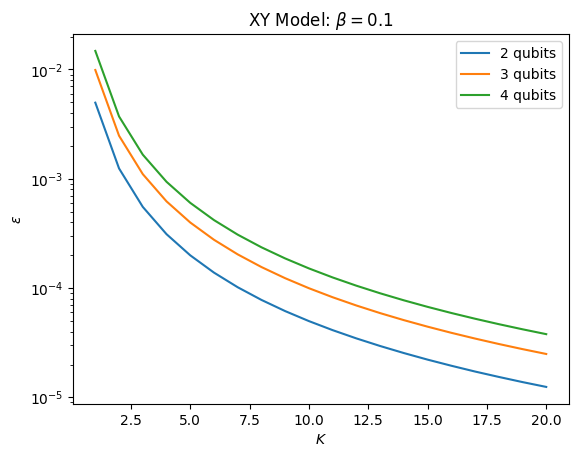

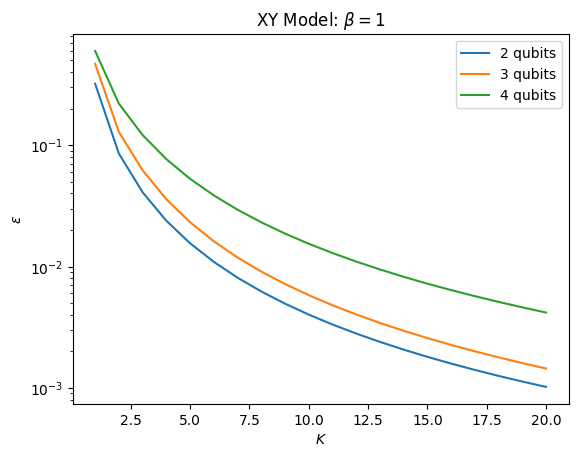

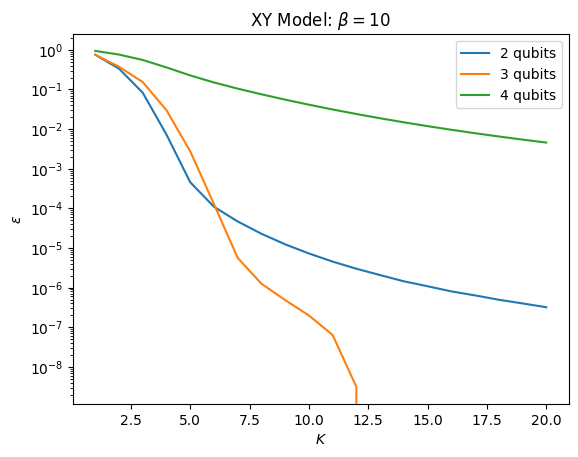

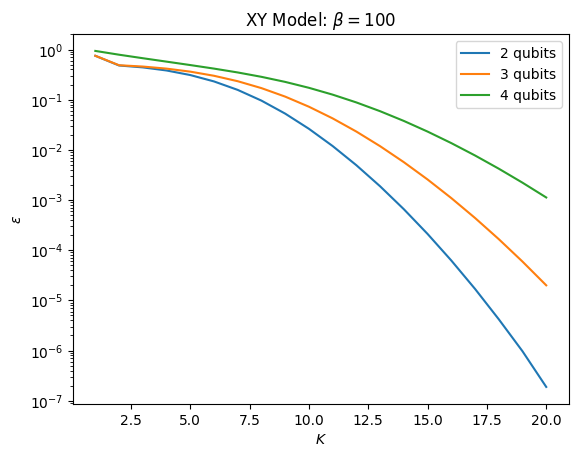

In [10]:
nqubits = [2,3,4]
beta = [0.01 , 0.1 , 1, 10, 100]
for l in range(len(beta)):
    plt.figure()
    plt.title("XY Model: " + r'$\beta = $' + str(beta[l]))
    for j in range(len(nqubits)):
        H_def = sum([X(x)*X(x+1) +Y(x)*Y(x+1)   for x in range(nqubits[j]-1)])
        H = hamiltonians.SymbolicHamiltonian(H_def).matrix
        H = np.kron(H,np.eye(2**nqubits[j]))
        H = sp.sparse.csr_matrix(H)
        size = 20
        K = np.linspace(1, size, size)
        fidelity = np.empty(size+1)
        initState = tfd0(nqubits[j])
        tfd = TFD(beta[l], H, initState)
        fidelity[0] = UJFidelity(tfd, initState)
        for k in range(size):
            initState = tfd0(nqubits[j])
            for i in range(k):
                s = bestApproximatingStep(H, initState, beta[l]/(2*K[k]))
                initState = DBI(1,H,s,initState)[-1]

            fidelity[k+1] = UJFidelity(tfd, initState)
        plt.plot(K, 1-fidelity[1:], label = f'{nqubits[j]} qubits')

    plt.yscale('log')
    plt.xlabel(r'$K$')
    plt.ylabel(r'$\epsilon$')
    plt.legend()


[Qibo 0.2.16|INFO|2025-04-03 14:52:39]: Using numpy backend on /CPU:0
[Qibo 0.2.16|WARNING|2025-04-03 14:52:39]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


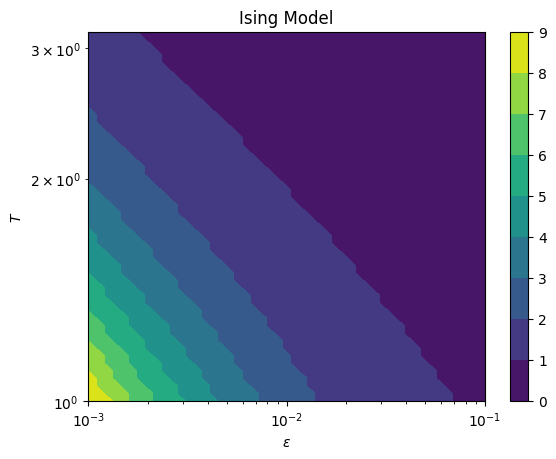

In [2]:
beta = np.logspace(-0.5, 0, 50)
eps= np.logspace(-1, -3, 50)
nqubits = 3
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H = sp.sparse.csr_matrix(H)
K = np.empty((len(beta),len(eps)))

for i in tqdm(range(len(beta))):
    k = 0
    for j in range(len(eps)):
        K[i,j]  = thermalStatePrepKNumbers(beta[i],eps[j], H, nqubits, "DBI", K = k)
        #k = int(K[i,j])
plt.figure()
plt.title('Ising Model')
plt.contourf(eps, 1/beta, K, levels = int(np.max(K)))
plt.ylabel(r'$T$')
plt.xlabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()



In [ ]:
beta = np.logspace(-0.5, 0, 50)
eps= np.logspace(-1, -3, 50)
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H = sp.sparse.csr_matrix(H)
K = np.empty((len(beta),len(eps)))

for i in tqdm(range(len(beta))):
    k = 0
    for j in range(len(eps)):
        K[i,j]  = thermalStatePrepKNumbers(beta[i],eps[j], H, nqubits, "DBI", K = k)
        #k = int(K[i,j])
plt.figure()
plt.title('Ising Model')
plt.contourf(eps, 1/beta, K, levels = int(np.max(K)))
plt.ylabel(r'$T$')
plt.xlabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()



[Qibo 0.2.16|WARNING|2025-04-03 14:59:51]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


0.0


  2%|▏         | 1/50 [00:05<04:07,  5.05s/it]


KeyboardInterrupt: 

[Qibo 0.2.16|INFO|2025-03-28 13:53:55]: Using numpy backend on /CPU:0
[Qibo 0.2.16|WARNING|2025-03-28 13:53:55]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
100%|██████████| 50/50 [00:17<00:00,  2.87it/s]


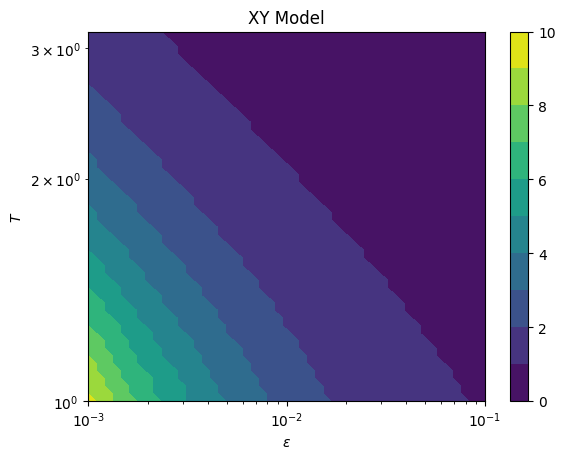

In [ ]:
beta = np.logspace(-0.5, 0, 50)
eps = np.logspace(-1, -3, 50)
nqubits = 3
H_def = sum([X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H = sp.sparse.csr_matrix(H)
K = np.empty((len(beta),len(eps)))

for i in tqdm(range(len(beta))):
    k = 0
    for j in range(len(eps)):
        K[i,j]  = thermalStatePrepKNumbers(beta[i], eps[j], H, nqubits, "DBI", K = k)
        #k = int(K[i,j])
plt.figure()
plt.title('XY Model')
plt.contourf(eps, 1/beta, K, levels = int(np.max(K)))
plt.ylabel(r'$T$')
plt.xlabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()



[Qibo 0.2.16|WARNING|2025-03-28 13:54:27]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
100%|██████████| 50/50 [33:08<00:00, 39.77s/it] 


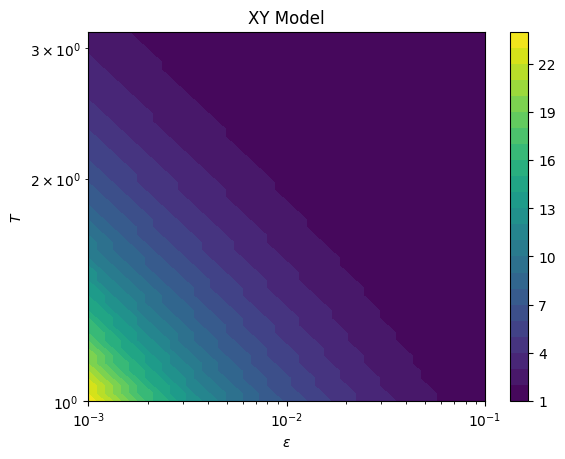

In [ ]:
beta = np.logspace(-0.5, 0, 50)
eps = np.logspace(-1, -3, 50)
nqubits = 4
H_def = sum([X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H = sp.sparse.csr_matrix(H)
K = np.empty((len(beta),len(eps)))

for i in tqdm(range(len(beta))):
    k = 0
    for j in range(len(eps)):
        K[i,j]  = thermalStatePrepKNumbers(beta[i], eps[j], H, nqubits, "DBI", K = k)
        #k = int(K[i,j])
plt.figure()
plt.title('XY Model')
plt.contourf(eps, 1/beta, K, levels = int(np.max(K)))
plt.ylabel(r'$T$')
plt.xlabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

